<a href="https://colab.research.google.com/github/manu-96/CNN/blob/main/CNN_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


**2 PROCESS DATA**


 **visualize examples**

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, y_train = get_three_classes(x_train, y_train)

x_test, y_test = get_three_classes(x_test, y_test)


print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


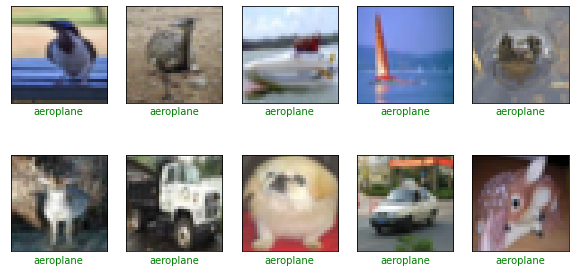

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)


class_names = ['aeroplane', 'car' , 'bird']
def show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 10, replace = False)

  x = x[indices]
  y = y[indices]
  p = p[indices] 

  plt.figure(figsize = (10, 5))
  for i in range (10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()


show_random_examples(x_train, y_train, y_train)    


**CREATE MODEL**

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input

def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model

  model = tf.keras.models.Sequential()
  model.add(Input(shape = (32, 32, 3)))
  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)
  model.add(Flatten())
  model.add(Dense(3, activation = 'softmax'))
  model.compile(
      loss = 'categorical_crossentropy',
      optimizer = 'adam', metrics = ['accuracy']
  )  

  return model

model = create_model()
model.summary()  


 h = model.fit(
     x_train/255., y_train,
     validation_data = (x_test/255., y_test),
     epochs = 10, batch_size = 128,
     callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                  tf.keras.callbacks.ModelCheckpoint(
                      'models/model_{val_accuracy:.3f}.h5',
                      save_best_only= True, save_weights_only = False,
                      monitor ='val_accuracy'
                  )
                  ]
 )


IndentationError: ignored

**TRAINING**

In [ ]:
 import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
 
 h = model.fit(
     x_train/255., y_train,
     validation_data = (x_test/255., y_test),
     epochs = 10, batch_size = 128,
     callbacks = [
                  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                  tf.keras.callbacks.ModelCheckpoint(
                      'models/model_{val_accuracy:.3f}.h5',
                      save_best_only= True, save_weights_only = False,
                      monitor ='val_accuracy'
                  )
                  ]
 )

NameError: ignored